### 결정 트리의 앙상블

앙상블은 여러 머신러닝 모델을 연결하여, 더 강력한 모델을 만드는 기법입니다. 머신러닝에 이런 종류의 모델이 많지만 그 중 두 앙상블 모델이 분류와 회귀에서 효과적이라고 입증이 되었다. 

`랜덤 포레스트`와 `그래디언트 부스팅` 결정트리는 둘다 모델을 구성하는 기본 요소로 결정 트리를 사용한다. 

#### 랜덤 포레스트

결정트리는 주로 훈련 데이터에 과대적합되는 경향이 있다. 그런데 랜덤포레스트를 활용하면 이런 현상을 방지할 수 있다. 랜덤포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다. 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만, 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초합니다. 예컨대 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있습니다. 이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것이 수학적으로 증명되었습니다.   

이런 전략을 구현하려면 결정트리를 많이 만들어야 한다. 각각의 트리는 타깃 예측을 잘 해야하고 다른 트리와는 구별이 되어야 합니다. 랜덤 포레스트는 이름에서도 알 수 있다 시피 트리들이 달라지도록 트리 생성 시 `무작위성` 주입을 한다. 랜덤포레스트에서 트리를 랜덤하게 만드는 방법은 두 가지입니다. 트리를 만들 때, 사용하는 데이터 포인트를 무작위로 선택하는 방법과 분할 테스트에서 특성을 무작위로 선택하는 방법입니다. 이 방식들을 자세히 살펴보겠습니다.  

#### 랜덤 포레스트 구축 

랜덤 포레스트 모델을 만들려면 생성할 트리의 개수가 정해져야 한다. (RandomForest Regressor나 RandomForestClassifier의 n_estimators 매개변수). 여기에서는 트리가 10개 필요하다라고 가정하겠습니다. 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위하게 선택을 합니다. 


트리를 만들기 위해 먼저 데이터의 `부트스트랩 샘플`을 생성합니다. 다시 말해 n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출합니다. (한 샘플이 여러 번 중복 추출될 수 있습니다) 이 데이터 셋은 원래 데이터 셋 크기와 같지만 어떤 데이터 포인트는 누락될 수 있고 어떤 데이터 포인트는 중복되어 들어올 수 있습니다.  

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [6]:
### 폰트설정

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)


NanumGothic


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


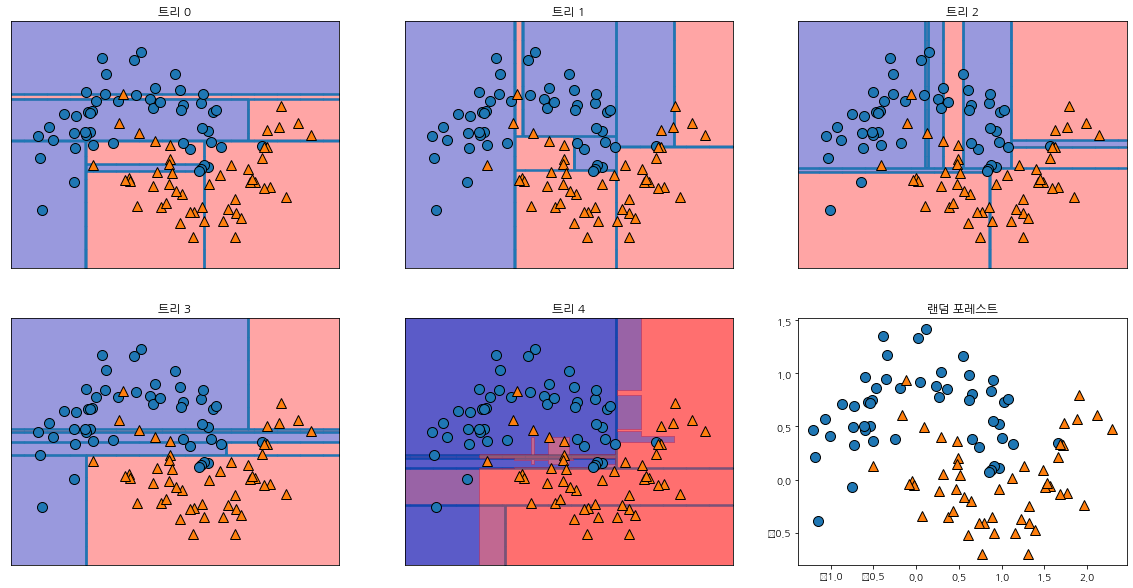

In [7]:
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, 1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


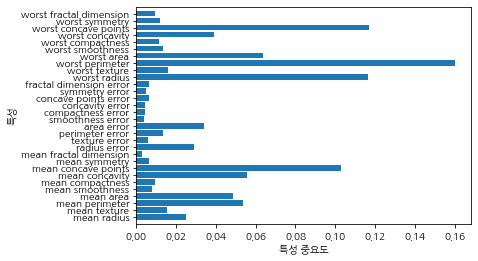

In [11]:
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)